In [34]:
from manage_data import get_datasets
# from manage_data import plot_coefficients_linSVC
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

In [35]:
def plot_coefficients_linSVC(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(60, 20))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()

In [38]:
df = get_datasets(std_size=True)
y = df['BRCA'].values
X = df.drop('BRCA', axis=1)

size brca, ovca 1080 579
sampled size 1158
1157 49554


In [41]:
np.sum(y==1)

579

In [42]:
df.shape

(1157, 24777)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
normalised_x_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

svc_unnorm = SVC(kernel='linear')
svc_unnorm.fit(X_train, y_train)
un_score = svc_unnorm.score(X_test, y_test)

svc_norm = SVC(kernel='linear')
svc_norm.fit(normalized_x_train, y_train)
nm_score = svc_norm.score(normalised_x_test, y_test)
print('unnormalised score =', un_score)
print('scaled score =', nm_score)

unnormalised score = 0.8758620689655172
scaled score = 0.8620689655172413


In [55]:
pca = PCA(n_components=10)

# X_pca = pca.fit(X)

X_reduced = PCA(n_components=10).fit_transform(X)

In [57]:
# print(pca.explained_variance_ratio_)

In [58]:
pca_df = X.copy()
pca_df['pcX'] = X_reduced[:, 0 ]
pca_df['pcY']=  X_reduced[:,1 ]
pca_df['y'] = y

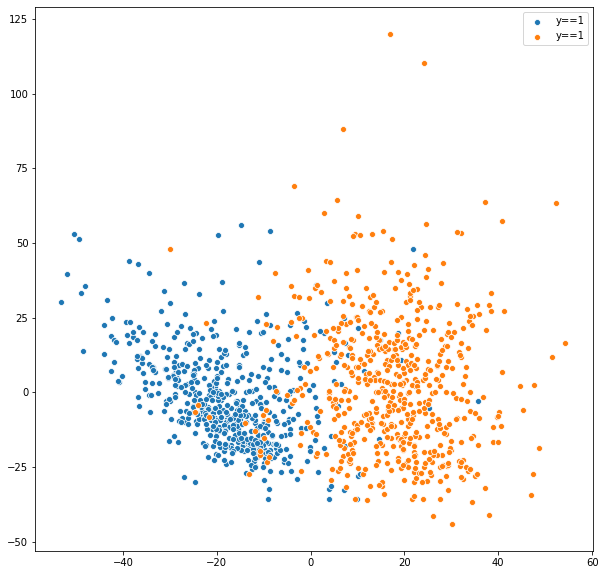

In [48]:
import seaborn as sns
_, ax = plt.subplots(1,1,figsize=(10,10))
sns.scatterplot(x= X_reduced[y==1, 0], y= X_reduced[y==1, 1], ax=ax, label='y==1' )
sns.scatterplot(x= X_reduced[y==0, 0], y= X_reduced[y==0, 1], ax=ax, label='y==1' )

In [9]:
pca = PCA(n_components=0.99)
pca.fit(X_train)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (1157, 24776)
transformed shape: (1157, 517)


In [10]:
for x in [0.34, 0.68, 0.95, 0.997, 0.9999, 0.999999, 0.999999998, 0.999999999997440]:
    pca = PCA(n_components=x)
    pca.fit(X_train)
    X_pca = pca.transform(X)
    print('at', x, '% of the variance ======')
    print("original shape:   ", X.shape)
    print("transformed shape:", X_pca.shape)
    y_red = pd.Series(y)

    df_redd = pd.DataFrame(X_pca)
    svc_reddim = SVC()
    # y_red
    X_traind, X_testd, y_traind, y_testd = train_test_split(df_redd, y)
    svc_reddim.fit(X_traind, y_traind)
    print(svc_reddim.score(X_testd, y_testd))

at 0.34 % of the variance ======
original shape:    (1157, 24776)
transformed shape: (1157, 10)
0.9482758620689655
at 0.68 % of the variance ======
original shape:    (1157, 24776)
transformed shape: (1157, 49)
0.9689655172413794
at 0.95 % of the variance ======
original shape:    (1157, 24776)
transformed shape: (1157, 280)
0.9586206896551724
at 0.997 % of the variance ======
original shape:    (1157, 24776)
transformed shape: (1157, 637)
0.9827586206896551
at 0.9999 % of the variance ======
original shape:    (1157, 24776)
transformed shape: (1157, 795)
0.9551724137931035
at 0.999999 % of the variance ======
original shape:    (1157, 24776)
transformed shape: (1157, 856)
0.9724137931034482
at 0.999999998 % of the variance ======
original shape:    (1157, 24776)
transformed shape: (1157, 866)
0.9448275862068966
at 0.99999999999744 % of the variance ======
original shape:    (1157, 24776)
transformed shape: (1157, 866)
0.9620689655172414


plotting


KeyboardInterrupt: 

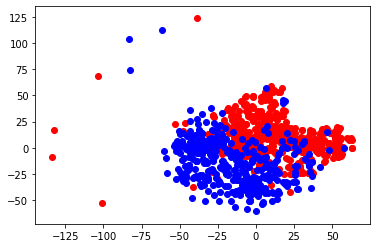

In [28]:
X_embedded = TSNE(n_components=2, perplexity=5).fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111)
print("plotting")
for (a,col) in zip(X_embedded, y):
    if a[0] > 20 and a[1] > 20: 
        continue
    if col == 1:
        ax.scatter(a[0], a[1], color='r')
    else:
        ax.scatter(a[0], a[1], color='b')

size brca, ovca 1080 579
normal size 1659
1658 49554
circles, perplexity=5 in 1.3e+02 sec
plotting
circles, perplexity=30 in 1.5e+02 sec
plotting
circles, perplexity=50 in 1.3e+02 sec
plotting
circles, perplexity=100 in 1.5e+02 sec
plotting


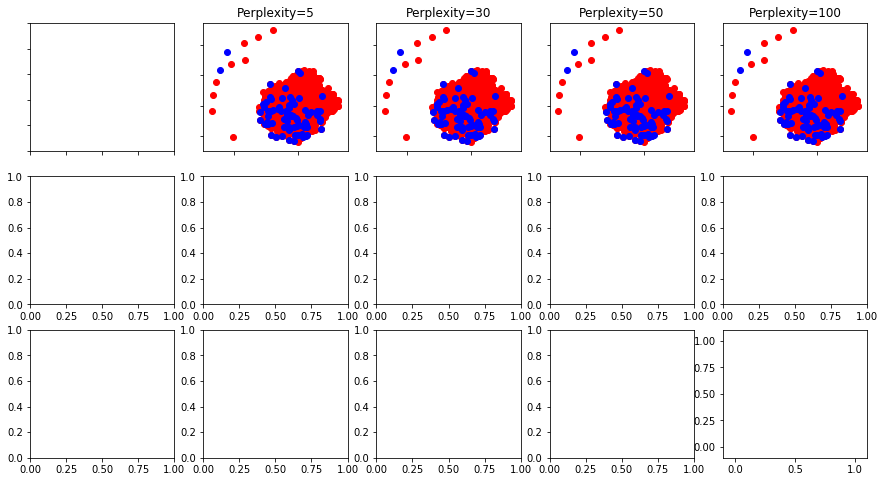

In [31]:
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(3, 5, figsize=(15, 8))
perplexities = [5, 30, 50, 100]



red = y == 0
green = y == 1

ax = subplots[0][0]
# ax.scatter(X[red, 0], X[red, 1], c="r")
# ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

df = get_datasets()
y = df['BRCA']
X = df.drop('BRCA', axis=1)

for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i + 1]
    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    print("plotting")
    for (a,col) in zip(X_embedded, y):
#         if a[0] > 20 and a[1] > 20: 
#             continue
        if col == 1:
            ax.scatter(a[0], a[1], color='r')
        else:
            ax.scatter(a[0], a[1], color='b')
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

